<a href="https://colab.research.google.com/github/parkhy0106/HolyMoly/blob/master/Graph(molecular)-neural-network/CPF_custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/BUPT-GAMMA/CPF.git

Cloning into 'CPF'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 124 (delta 47), reused 79 (delta 21), pack-reused 0
Receiving objects: 100% (124/124), 22.84 MiB | 20.21 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [ ]:
!pip3 install pip install rdkit-pypi

     |████████████████████████████████| 18.6 MB 1.2 MB/s 


In [ ]:
cd CPF

/content/CPF


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 25.9 MB 1.8 MB/s 
     |████████████████████████████████| 58 kB 5.1 MB/s 
     |████████████████████████████████| 282 kB 51.0 MB/s 
     |████████████████████████████████| 1.6 MB 51.8 MB/s 
     |████████████████████████████████| 25.0 MB 69.3 MB/s 
     |████████████████████████████████| 776.8 MB 15 kB/s 
     |████████████████████████████████| 281 kB 59.0 MB/s 
     |████████████████████████████████| 14.5 MB 63 kB/s 
     |████████████████████████████████| 70 kB 8.7 MB/s 
     |████████████████████████████████| 4.2 MB 30.8 MB/s 
     |████████████████████████████████| 636 kB 62.1 MB/s 
     |████████████████████████████████| 22.3 MB 10.2 MB/s 
     |████████████████████████████████| 164 kB 50.5 MB/s 
     |████████████████████████████████| 80 kB 8.4 MB/s 
     |████████████████████████████████| 184 kB 61.1 MB/s 
     |████████████████████████████████| 191 kB 53.2 MB/s 
     |████████████████████████████████| 73 kB 1.6 MB/s 
     |███████████████

In [ ]:
!pip install dgllife

     |████████████████████████████████| 133 kB 31.4 MB/s 
  Created wheel for dgllife: filename=dgllife-0.2.8-py3-none-any.whl size=213162 sha256=fb65066eebcf1d7ee5aa19b1e2982d7d5d8ea73565989445701c161597126a77
  Stored in directory: /root/.cache/pip/wheels/b6/81/6f/6bbc4b7a80b06d92829b5362a78277173c9e7b46d294d4ca45
Successfully built dgllife


In [ ]:
import dgl
import torch
import numpy as np

In [ ]:
from rdkit import Chem
from dgllife.utils import load_molecule , mol_to_bigraph, get_mol_3d_coordinates, mol_to_complete_graph, smiles_to_bigraph
from dgllife.utils import analyze_mols, ConcatFeaturizer, atomic_number, bond_type_one_hot
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
mol, coordinates = load_molecule('/content/drive/MyDrive/235789_Samsung AI Challenge for Scientific Discovery_data/dev_sdf/dev_0.sdf',sanitize=True,calc_charges=True,use_conformation=True)

In [ ]:
mol.UpdatePropertyCache()

In [ ]:
def featurize_atoms(mol):
    feats = []
    for atom in mol.GetAtoms():
        feats.append(atomic_number(atom))
    return {'atomic': torch.tensor(feats).reshape(-1, 1).float()}

In [ ]:
def featurize_bonds(mol):
    feats = []
    bond_types = [Chem.rdchem.BondType.SINGLE, Chem.rdchem.BondType.DOUBLE,
                  Chem.rdchem.BondType.TRIPLE, Chem.rdchem.BondType.AROMATIC]
    for bond in mol.GetBonds():
         btype = bond_types.index(bond.GetBondType())
         # One bond between atom u and v corresponds to two edges (u, v) and (v, u)
         feats.extend([btype, btype])
    return {'type': torch.tensor(feats).reshape(-1, 1).float()}

In [ ]:
dgl_gph = mol_to_bigraph(mol,canonical_atom_order = True, explicit_hydrogens=True ,node_featurizer=featurize_atoms, edge_featurizer=featurize_bonds)

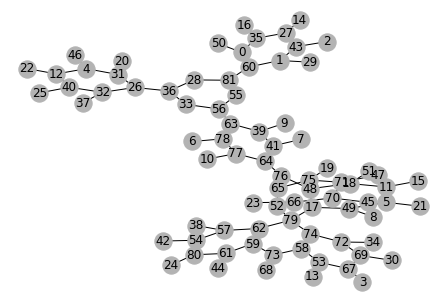

In [ ]:
nx_G = dgl_gph.to_networkx().to_undirected()
pos = nx.layout.kamada_kawai_layout(nx_G)
nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])

In [ ]:
data = np.load('/content/CPF/data/npz/cora.npz')

In [ ]:
data.files

['adj_data',
 'adj_indices',
 'adj_indptr',
 'adj_shape',
 'attr_data',
 'attr_indices',
 'attr_indptr',
 'attr_shape',
 'labels',
 'node_names',
 'class_names']

In [ ]:
data['attr_data']

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)